<img style='float:left' src='https://omegaml.omegaml.io/static/logo.a3fc30c8aa01.jpg'>
<br><br><br><br>

**Work with data & machine learning models**

* easily store data in a high-performance data cluster (MongoDB)
* store your fitted or unfitted scikit-learn models
* run predictions on the compute cluster directly from stored data
* store & use remote data (ftp, http, s3)

** Easily use compute resources in the cluster **

* fit models in the compute cluster, in parallel
* perform grid search
* all asynchronously

**Share data, notebooks**

* write, store & share notebooks directly online, no setup required
* run jobs on a regular schedule
* share notebooks and data across users

**Automatic REST API for any client**

* datasets
* models
* jobs (reports)
* arbitrary custom scripts (python)

** On-Premise or On-Cloud Custom Installation **

* customizable backends (e.g. Spark, R, SAS)
* custom runtimes (e.g. dask, Spark)
* arbitrary data storage extensions API
* custom data types extensions API
* native-Python data streaming API (like Spark Streaming, much simpler)

In [71]:
# setup using credentials. typically hidden from user, made visible for demo
import warnings
warnings.filterwarnings('ignore')
auth_config = dict(username='test7', apikey='75c32bd72350e3acfd0617b124079a1a7cfc3046')
import omegaml as om
om = om.setup(**auth_config, api_url='https://omegaml.omegaml.io')
print("omega|ml is loaded", om is not None)

omega|ml is loaded True


In [65]:
# list datasets stored in cluster
om.datasets.list()

['_fitX_072e9ae7b02f44949b62a825a0ee7d7a',
 '_fitX_0e84281bc6004436bfce233c7107388b',
 '_fitX_179c72bea05d4fd487297db50c14fe4e',
 '_fitX_26646d9ec4234a079a6f355dba8527bf',
 '_fitX_3789ccdde4494f3b8bb45af4f95045a0',
 '_fitX_5db75a17dece46e6816e03384a2d0ad3',
 '_fitX_5ef779a3ede64e72b192459b68ee85ea',
 '_fitX_6b491ad55fce486b811e6994b2de88bb',
 '_fitX_7bd02e2e3bb84c83b33d1b7b92b622ea',
 '_fitX_7d6130db052d49eb93e0b52016f0aa9d',
 '_fitX_9e6994fa85334feeb5057fdf3d5ae63b',
 '_fitX_bd313b53c56143c28999579f54a51312',
 '_fitX_c2783821db214b6fbf97088e520d7747',
 '_fitY_2c04002b9f1b429b82a4f2049f83a508',
 '_fitY_3e8edac304b342a08f90f0812426db88',
 '_fitY_49b4155dd754494fab3d544c9ad813ed',
 '_fitY_5175fa3e441b42b591356a5e8c29f44a',
 '_fitY_695221030f284f94b44e4afce2d13730',
 '_fitY_70911475ae86493cb61c92b3ae703cbe',
 '_fitY_81aa65781a72463e91be9ae3582c0088',
 '_fitY_917047748dc14ab5a39dd6fa065ece60',
 '_fitY_94b04e2a2efd4b1b99d70072825e4a28',
 '_fitY_989eb02462eb41f7958f931a98f957b4',
 '_fitY_af2

In [67]:
# list models stored in clusters
om.models.list()

['google-predict',
 'iris-model',
 'iris-model.2018-04-17T19:27:05.167912.gs',
 'iris-model.2018-04-17T19:28:30.730810.gs',
 'iris-model.2018-04-17T20:15:11.141411.gs',
 'iris-model.2018-04-17T20:16:03.073222.gs',
 'iris-model.2018-04-17T20:16:21.293025.gs']

In [4]:
# list jobs & results stored in cluster
om.jobs.list()

['Untitled.ipynb',
 'regular.ipynb',
 'results/regular_1523987251.ipynb',
 'results/regular_1523991504.ipynb',
 'results/regular_1523991507.ipynb',
 'results/regular_1523991509.ipynb',
 'results/regular_1523992499.ipynb']

In [5]:
# list custom scripts stored in cluster
om.scripts.list()

['helloworld']

In [6]:
# store any python data
om.datasets.put(['any data'], 'mydata')
om.datasets.get('mydata')

[['any data'], ['any data'], ['any data'], ['any data']]

In [8]:
# store numpy arrays and pandas dataframes
import pandas as pd
from sklearn.datasets import load_iris
X, y = load_iris(True)
data = pd.DataFrame(X)
data['y'] = y
data.head()
om.datasets.put(data, 'iris')
om.datasets.get('iris').head()

,0,1,2,3,y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
# store remote datasets as a reference (no copy)
om.datasets.put('http://data.cityofnewyork.us/api/views/kku6-nxdu/rows.csv?accessType=DOWNLOAD', 'demographics')
om.datasets.get('demographics')

,JURISDICTION NAME,COUNT PARTICIPANTS,COUNT FEMALE,PERCENT FEMALE,COUNT MALE,PERCENT MALE,COUNT GENDER UNKNOWN,PERCENT GENDER UNKNOWN,COUNT GENDER TOTAL,PERCENT GENDER TOTAL,...,COUNT CITIZEN STATUS TOTAL,PERCENT CITIZEN STATUS TOTAL,COUNT RECEIVES PUBLIC ASSISTANCE,PERCENT RECEIVES PUBLIC ASSISTANCE,COUNT NRECEIVES PUBLIC ASSISTANCE,PERCENT NRECEIVES PUBLIC ASSISTANCE,COUNT PUBLIC ASSISTANCE UNKNOWN,PERCENT PUBLIC ASSISTANCE UNKNOWN,COUNT PUBLIC ASSISTANCE TOTAL,PERCENT PUBLIC ASSISTANCE TOTAL
0,10001,44,22,0.50,22,0.50,0,0,44,100,...,44,100,20,0.45,24,0.55,0,0,44,100
1,10002,35,19,0.54,16,0.46,0,0,35,100,...,35,100,2,0.06,33,0.94,0,0,35,100
2,10003,1,1,1.00,0,0.00,0,0,1,100,...,1,100,0,0.00,1,1.00,0,0,1,100
3,10004,0,0,0.00,0,0.00,0,0,0,0,...,0,0,0,0.00,0,0.00,0,0,0,0
4,10005,2,2,1.00,0,0.00,0,0,2,100,...,2,100,0,0.00,2,1.00,0,0,2,100
5,10006,6,2,0.33,4,0.67,0,0,6,100,...,6,100,0,0.00,6,1.00,0,0,6,100
6,10007,1,0,0.00,1,1.00,0,0,1,100,...,1,100,1,1.00,0,0.00,0,0,1,100
7,10009,2,0,0.00,2,1.00,0,0,2,100,...,2,100,0,0.00,2,1.00,0,0,2,100
8,10010,0,0,0.00,0,0.00,0,0,0,0,...,0,0,0,0.00,0,0.00,0,0,0,0
9,10011,3,2,0.67,1,0.33,0,0,3,100,...,3,100,0,0.00,3,1.00,0,0,3,100


In [10]:
# store financial time series including indicies
%matplotlib inline
import pandas as pd
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2017, 1, 1)
end = datetime.datetime(2018, 1, 31)
prices = web.DataReader("GOOGL", 'morningstar', start, end)
prices.head()

Close     High     Low    Open   Volume
Symbol Date                                                
GOOGL  2017-01-02  792.45  792.450  792.45  792.45        0
       2017-01-03  808.01  811.435  796.89  800.62  1959033
       2017-01-04  807.77  813.430  804.11  809.89  1515339
       2017-01-05  813.02  813.740  805.92  807.50  1340535
       2017-01-06  825.21  828.960  811.50  814.99  2017097

In [24]:
# get data back in their original format
om.datasets.put(prices, 'google', append=False)
prices = om.datasets.get('google')
prices.head()

Close     High     Low    Open   Volume
Symbol Date                                                
GOOGL  2017-01-02  792.45  792.450  792.45  792.45        0
       2017-01-03  808.01  811.435  796.89  800.62  1959033
       2017-01-04  807.77  813.430  804.11  809.89  1515339
       2017-01-05  813.02  813.740  805.92  807.50  1340535
       2017-01-06  825.21  828.960  811.50  814.99  2017097

In [12]:
# filter data in the database -- notice the nice syntax
%time om.datasets.get('google', Close__gte=900, Close__lte=920)

CPU times: user 54.8 ms, sys: 8.23 ms, total: 63 ms
Wall time: 344 ms


Close    High     Low    Open   Volume
Symbol Date                                               
GOOGL  2017-07-03  919.46  934.24  915.31  933.22  1694811
       2017-07-04  919.46  919.46  919.46  919.46        0

In [ ]:
# filter & aggregate data locally (let's make it large)
x = [om.datasets.put(prices, 'google-large') for i in range(100)]

In [26]:
def getdata():
  data = om.datasets.get('google-large')
  return data[(data.Close >= 900) & (data.Close <= 920)].mean() 

%time getdata()

CPU times: user 746 ms, sys: 32.9 ms, total: 779 ms
Wall time: 1.17 s


Close        919.460
High         926.850
Low          917.385
Open         926.340
Volume    847405.500
dtype: float64

In [27]:
# filter and aggregate by database - 2-3x faster
%time om.datasets.getl('google-large', Close__gte=900, Close__lte=920).mean().iloc[0]

CPU times: user 48.8 ms, sys: 0 ns, total: 48.8 ms
Wall time: 332 ms


Close_mean        919.460
High_mean         926.850
Low_mean          917.385
Open_mean         926.340
Volume_mean    847405.500
Name: 0, dtype: float64

In [38]:
# index based access by loading data first
def getdata():
    dfx = om.datasets.get('google-large')
    return dfx.loc[('GOOGL', pd.to_datetime('2017-01-02'))]
%time getdata()

CPU times: user 499 ms, sys: 39.6 ms, total: 538 ms
Wall time: 968 ms


Close    High     Low    Open  Volume
Symbol Date                                              
GOOGL  2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
...                   ...     ...     ...     ...     ...
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0
       2017-01-02  792.45  792.45  792.45  792.45       0

[100 rows x 5 columns]

In [39]:
# index-based access directly in database
dfx = om.datasets.getl('google-large')
%time dfx.loc[('GOOGL', pd.to_datetime('2017-01-02'))].value

CPU times: user 24 ms, sys: 216 µs, total: 24.2 ms
Wall time: 122 ms


Close    High     Low    Open  Volume
GOOGL 2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
...                  ...     ...     ...     ...     ...
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0
      2017-01-02  792.45  792.45  792.45  792.45       0

[100 rows x 5 columns]

(279, 2) (279,)


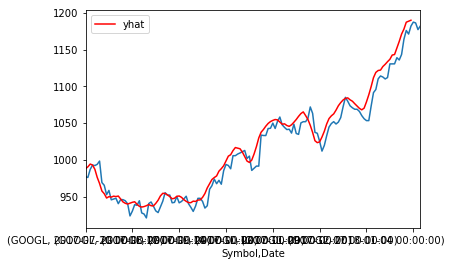

In [40]:
# train models locally
%matplotlib inline
import pandas as pd 

from sklearn.svm import SVR

X = prices[['High', 'Low']].rolling(5).mean().dropna()
y = prices.iloc[4:]['Close']
print(X.shape, y.shape)

train_loc = X.shape[0] // 2

model = SVR(kernel='linear', tol=0.1)
model.fit(X.iloc[0:train_loc], y.iloc[0:train_loc])

r2 = model.score(X, y)
yhat = pd.DataFrame({'yhat': model.predict(X[train_loc:])})
yhat.index = X.index[train_loc:]

ax = prices.iloc[train_loc:]['Close'].plot()
yhat.plot(color='r', ax=ax)

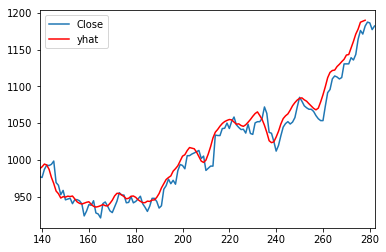

In [41]:
# predict remotely

# store models and new data
om.models.put(model, 'google-predict')
om.datasets.put(X[train_loc:], 'google-rolling', append=False)

# then predict remotely
pred = om.runtime.model('google-predict').predict('google-rolling[High,Low]').get()

# show results
pred = pd.DataFrame({'yhat': pred}, index=range(len(pred)))
actual = om.datasets.get('google[Close]').iloc[train_loc:]
pred.index = actual.index[:len(pred)]
ax = actual.plot()
pred.plot(color='r', ax=ax)

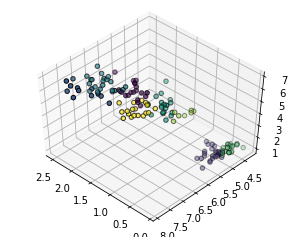

In [46]:
# we can also train remote
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X)
df['y'] = y

from sklearn.cluster import KMeans
model = KMeans(n_clusters=8)

# fit & predict remote
om.models.put(model, 'iris-model')
om.runtime.model('iris-model').fit(X, y)

# get back remote fitted model and show results
model = om.models.get('iris-model')
labels = model.labels_

fig = plt.figure(figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')
fig.show()

In [48]:
# perform gridsearch on cluster
om.datasets.put(df, 'iris', append=False)
params = {
            'n_clusters': range(1,8),
         }
meta = om.runtime.model('iris-model').gridsearch('iris[^y]', 'iris[y]', parameters=params).get()
meta.name

'iris-model'

In [49]:
om.models.metadata('iris-model')['attributes']['gridsearch']

[{'Xname': 'iris[^y]',
  'Yname': 'iris[y]',
  'datetime': datetime.datetime(2018, 4, 17, 19, 27, 5, 167000),
  'gsModel': 'iris-model.2018-04-17T19:27:05.167912.gs'},
 {'Xname': 'iris[^y]',
  'Yname': 'iris[y]',
  'datetime': datetime.datetime(2018, 4, 17, 19, 28, 30, 730000),
  'gsModel': 'iris-model.2018-04-17T19:28:30.730810.gs'},
 {'Xname': 'iris[^y]',
  'Yname': 'iris[y]',
  'datetime': datetime.datetime(2018, 4, 17, 20, 15, 11, 141000),
  'gsModel': 'iris-model.2018-04-17T20:15:11.141411.gs'},
 {'Xname': 'iris[^y]',
  'Yname': 'iris[y]',
  'datetime': datetime.datetime(2018, 4, 17, 20, 16, 3, 73000),
  'gsModel': 'iris-model.2018-04-17T20:16:03.073222.gs'},
 {'Xname': 'iris[^y]',
  'Yname': 'iris[y]',
  'datetime': datetime.datetime(2018, 4, 17, 20, 16, 21, 293000),
  'gsModel': 'iris-model.2018-04-17T20:16:21.293025.gs'}]

In [50]:
# look at gridsearch results
gs = om.models.get('iris-model.2018-04-17T19:28:30.730810.gs')
gs.best_estimator_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [72]:
# use the model REST API 
import requests
from omegacommon.auth import OmegaRestApiAuth
auth = OmegaRestApiAuth(**auth_config)
om.datasets.put(X, 'iris')
resp = requests.get('https://omegaml.omegaml.io/api/v1/model/iris-model/predict/?datax=iris', auth=auth)
resp.json()

{'datax': 'iris',
 'datay': None,
 'result': [1,
  5,
  5,
  5,
  1,
  1,
  5,
  1,
  5,
  5,
  1,
  5,
  5,
  5,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  5,
  1,
  5,
  5,
  1,
  1,
  1,
  5,
  5,
  1,
  1,
  1,
  5,
  5,
  1,
  5,
  5,
  1,
  1,
  5,
  5,
  1,
  1,
  5,
  1,
  5,
  1,
  5,
  7,
  7,
  7,
  4,
  7,
  4,
  7,
  6,
  7,
  4,
  6,
  4,
  4,
  7,
  4,
  7,
  4,
  4,
  0,
  4,
  0,
  4,
  0,
  7,
  7,
  7,
  7,
  7,
  7,
  6,
  6,
  6,
  4,
  0,
  4,
  7,
  7,
  7,
  4,
  4,
  4,
  7,
  4,
  6,
  4,
  4,
  4,
  7,
  6,
  4,
  3,
  0,
  2,
  3,
  3,
  2,
  4,
  2,
  3,
  2,
  3,
  0,
  3,
  0,
  0,
  3,
  3,
  2,
  2,
  0,
  3,
  0,
  2,
  0,
  3,
  2,
  0,
  0,
  3,
  2,
  2,
  2,
  3,
  0,
  0,
  2,
  3,
  3,
  0,
  3,
  3,
  3,
  0,
  3,
  3,
  3,
  0,
  3,
  3,
  0]}

In [54]:
# use the datasets REST API 
import requests
from omegacommon.auth import OmegaRestApiAuth
auth = OmegaRestApiAuth(**auth_config)
om.datasets.put(df, 'iris', append=False)
resp = requests.get('https://omegaml.omegaml.io/api/v1/dataset/iris/', auth=auth)
resp.json()

{'data': {'0': {'0': 5.1,
   '1': 4.9,
   '10': 5.4,
   '11': 4.8,
   '12': 4.8,
   '13': 4.3,
   '14': 5.8,
   '15': 5.7,
   '16': 5.4,
   '17': 5.1,
   '18': 5.7,
   '19': 5.1,
   '2': 4.7,
   '20': 5.4,
   '21': 5.1,
   '22': 4.6,
   '23': 5.1,
   '24': 4.8,
   '25': 5.0,
   '26': 5.0,
   '27': 5.2,
   '28': 5.2,
   '29': 4.7,
   '3': 4.6,
   '30': 4.8,
   '31': 5.4,
   '32': 5.2,
   '33': 5.5,
   '34': 4.9,
   '35': 5.0,
   '36': 5.5,
   '37': 4.9,
   '38': 4.4,
   '39': 5.1,
   '4': 5.0,
   '40': 5.0,
   '41': 4.5,
   '42': 4.4,
   '43': 5.0,
   '44': 5.1,
   '45': 4.8,
   '46': 5.1,
   '47': 4.6,
   '48': 5.3,
   '49': 5.0,
   '5': 5.4,
   '6': 4.6,
   '7': 5.0,
   '8': 4.4,
   '9': 4.9},
  '1': {'0': 3.5,
   '1': 3.0,
   '10': 3.7,
   '11': 3.4,
   '12': 3.0,
   '13': 3.0,
   '14': 4.0,
   '15': 4.4,
   '16': 3.9,
   '17': 3.5,
   '18': 3.8,
   '19': 3.8,
   '2': 3.2,
   '20': 3.4,
   '21': 3.7,
   '22': 3.6,
   '23': 3.3,
   '24': 3.4,
   '25': 3.0,
   '26': 3.4,
   '27': 3.5,


In [55]:
# deploy lambda-style arbitrary algorithms
om.scripts.put('pkg:///home/patrick/projects/omegaml/omegapkg/demo/helloworld/', 'helloworld')

running sdist
running check


writing manifest file 'MANIFEST'
creating helloworld-1.0
creating helloworld-1.0/helloworld
making hard links in helloworld-1.0...
hard linking README -> helloworld-1.0
hard linking setup.py -> helloworld-1.0
hard linking helloworld/__init__.py -> helloworld-1.0/helloworld
Creating tar archive
removing 'helloworld-1.0' (and everything under it)


<Metadata: Metadata(s3file={},bucket=omegaml,collection=None,name=helloworld,id=5ad6348bde39d1148501706d,created=2018-04-17 19:53:15.270000,attributes={'state': 'SUCCESS', 'task_id': 'a636c195-c4f8-43b9-8455-7f903efd333a'},prefix=scripts/,kind=python.package,kind_meta={},uri=None,gridfile=<GridFSProxy: omegaml.scripts_.helloworld.pkg>,objid=None)>

In [58]:
# run lambdas
from datetime import datetime
dtnow = datetime.now().isoformat()
om.runtime.script('helloworld').run(foo=dtnow).get()

{'kwargs': {'foo': '2018-04-17T22:17:30.168329'},
 'result': ('hello from helloworld', {'foo': '2018-04-17T22:17:30.168329'}),
 'runtime': 4e-06,
 'script': 'helloworld',
 'started': '2018-04-17T20:17:42.494423'}

In [62]:
# use REST API to run lambdas
import requests
from omegacommon.auth import OmegaRestApiAuth
auth = OmegaRestApiAuth(**auth_config)
resp = requests.post('https://omegaml.omegaml.io/api/v1/script/helloworld/run/', 
                     params=dict(foo=dtnow), auth=auth)
resp.json()

{'kwargs': {'foo': '2018-04-17T22:17:30.168329'},
 'result': ['hello from helloworld', {'foo': '2018-04-17T22:17:30.168329'}],
 'runtime': 4e-06,
 'script': 'helloworld',
 'started': '2018-04-17T20:18:41.537340'}

In [63]:
# run jobs (python notebooks) online
om.runtime.job('regular').run()
om.jobs.list()

['Untitled.ipynb',
 'regular.ipynb',
 'results/regular_1523987251.ipynb',
 'results/regular_1523991504.ipynb',
 'results/regular_1523991507.ipynb',
 'results/regular_1523991509.ipynb',
 'results/regular_1523992499.ipynb']

In [ ]:
data = om.jobs.export('results/regular_1523987251.ipynb', '/tmp/results.html')
import webbrowser
url = 'file:///tmp/results.html'
webbrowser.open(url)

In [ ]:
# per-user online dashboard 
http://omegaml.omegaml.io/dashboard
    
# per-user online notebook automated setup
http://omjobs.omegaml.io/